# Candlestick Three Stars In The South

https://www.investopedia.com/terms/t/three-stars-south.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'ZM'
start = '2018-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300


## Candlestick with Three Stars In The South

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737167.0,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,False
1,737171.0,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,True
2,737172.0,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,True
3,737173.0,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,False
4,737174.0,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,True


Text(0, 0.5, 'Price')

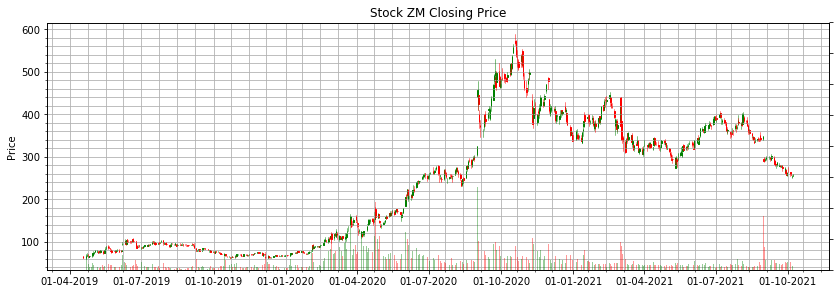

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
three_stars_south = talib.CDL3STARSINSOUTH(df['Open'], df['High'], df['Low'], df['Close'])

three_stars_south = three_stars_south[three_stars_south != 0]

In [6]:
df['three_stars_south'] = talib.CDL3STARSINSOUTH(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['three_stars_south'] !=0]

,Open,High,Low,Close,Adj Close,Volume,three_stars_south
Date,,,,,,,


In [8]:
df['Adj Close'].loc[df['three_stars_south'] !=0]

Series([], Name: Adj Close, dtype: float64)

In [9]:
df['Adj Close'].loc[df['three_stars_south'] !=0].index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
three_stars_south

Series([], dtype: int32)

In [11]:
three_stars_south.index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,three_stars_south
Date,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,0
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,0
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,0
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,0
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,0
...,...,...,...,...,...,...,...
2021-10-01,268.770996,274.570007,262.700012,267.510010,267.510010,8664800,0
2021-10-04,264.239990,264.572998,253.410004,259.579987,259.579987,5004600,0
2021-10-05,259.839996,262.739990,256.850006,257.119995,257.119995,3712100,0


Text(0, 0.5, 'Price')

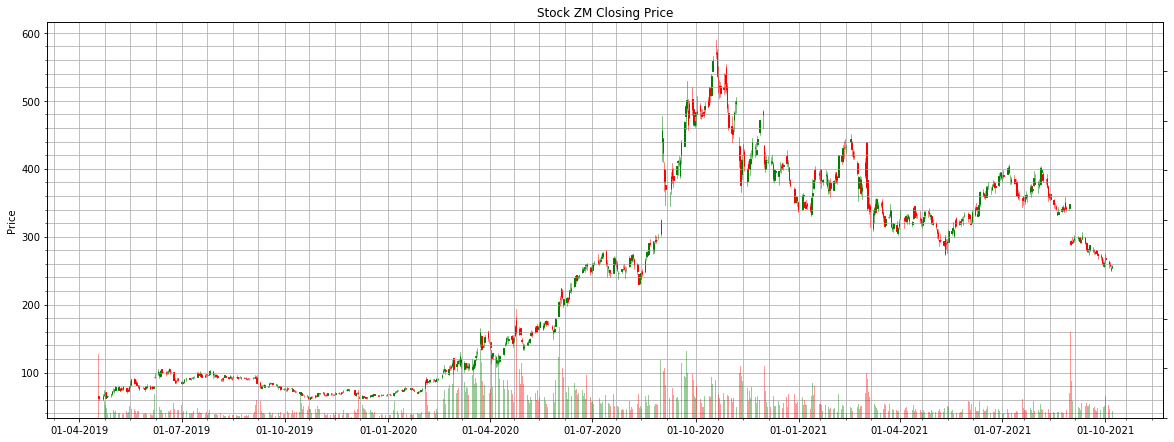

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_stars_south'] !=0].index, df['Adj Close'].loc[df['three_stars_south'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2020-03-01':'2020-12-31']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,three_stars_south,VolumePositive
0,737486.0,109.349998,114.500000,102.500000,113.110001,113.110001,10157400,0,True
1,737487.0,114.550003,119.199997,112.110001,117.470001,117.470001,11033700,0,True
2,737488.0,118.510002,119.970001,113.110001,116.800003,116.800003,12102600,0,False
3,737489.0,110.250000,129.830002,110.000000,125.000000,125.000000,28149400,0,True
4,737490.0,119.650002,122.000000,107.000000,114.320000,114.320000,22975700,0,False


Text(0, 0.5, 'Price')

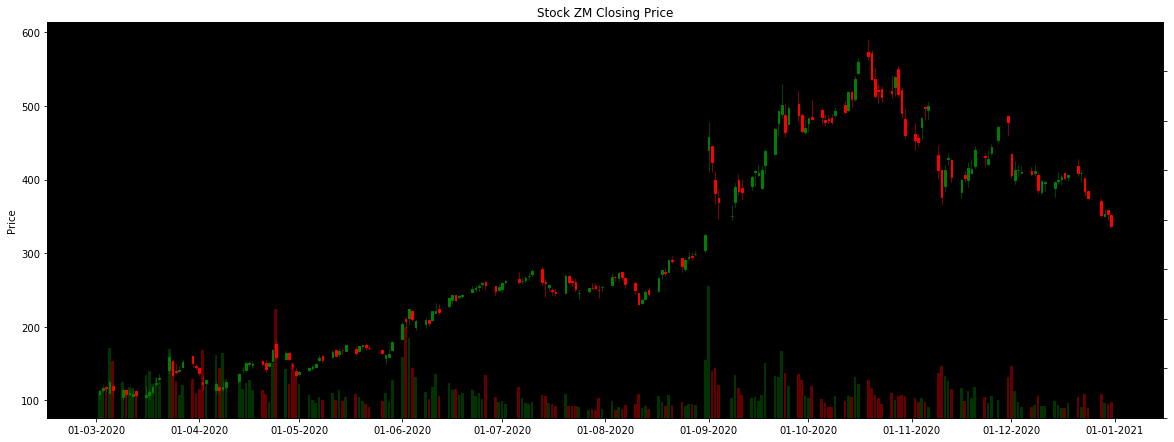

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_stars_south'] !=0].index, df['Adj Close'].loc[df['three_stars_south'] !=0],
                'vy', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

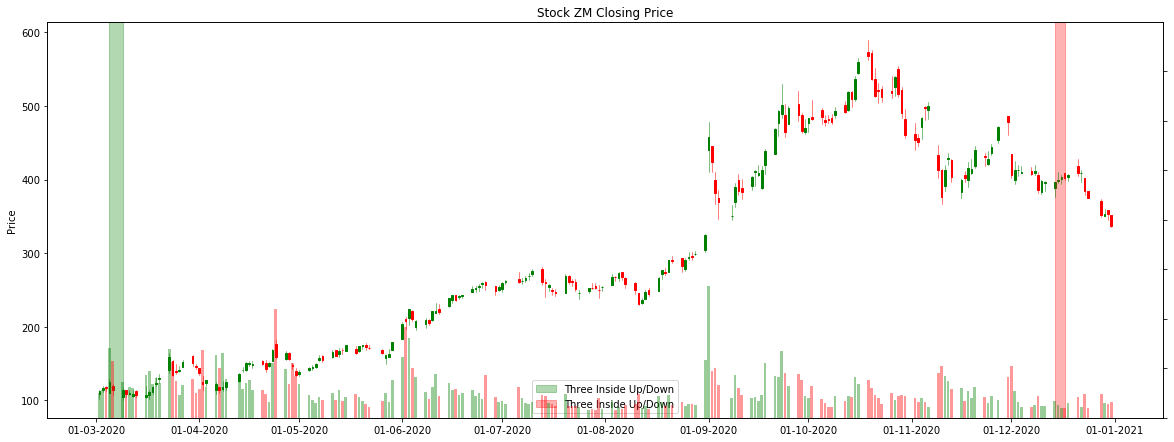

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2020,3,5)), date2num(datetime(2020,3,9)), 
           label="Three Inside Up/Down",color="green", alpha=0.3)
ax.axvspan(date2num(datetime(2020,12,14)), date2num(datetime(2020,12,17)), 
           label="Three Inside Up/Down",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')